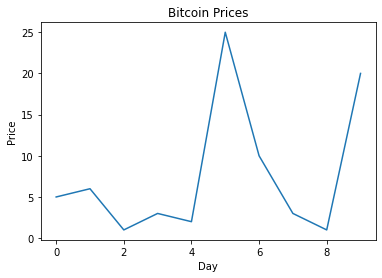

In [5]:
import pyibl
import random

import matplotlib.pyplot as plt

from tqdm import tqdm

PARTICIPANTS = 100
ROUNDS = 100
NOISE = 0.25
DECAY = 0.5
DEFAULT_UTILITY = 30

BITCOIN_PRICES = [5, 11, 1, 3, 2, 25, 10, 3, 1, 20]

plt.plot([day for day, _ in enumerate(BITCOIN_PRICES)], BITCOIN_PRICES)
plt.title('Bitcoin Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()


In [2]:



def run(rounds, participants, risky_wins=0.5):

    agent = pyibl.Agent(default_utility=DEFAULT_UTILITY, noise=NOISE, decay=DECAY)
    risky_chosen = [0] * rounds
    
    for _ in tqdm(range(participants)):
        agent.reset()
        
        for _ in range(rounds):
            choice = agent.choose("D", "C")

            if choice == "D":
                p1_deflect = True
            else:
                p1_deflect = False



    return [ n / participants for n in risky_chosen ]

def main():
    for p in (0.6, 0.5, 0.4):
        plt.plot(range(1, ROUNDS + 1), run(ROUNDS, PARTICIPANTS, p), label=f"p={p}")
    plt.ylim([0, 1])
    plt.ylabel("fraction choosing risky")
    plt.xlabel("round")
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

  0%|          | 0/100 [00:00<?, ?it/s]


RuntimeError: choice requested before previous outcome was supplied